### <span style="font-family:Copperplate Gothic"><u>INX FUTURE COMPANY - Employee Performance Analysis Visualization Report</u></span> 

 ### <span style="font-family:cursive">I ) Department wise performances</span> 
> In the department waise performance we have analysis the all all department performance, how they are performing according to atmosphere of company and othere factor 
    
        In the department sector there are Six department are avaible :
          → Sales
           → Human Resoruces
            → Development
             → Data Science
              → Reserch & Devlopment
               → Finace

#### <span style="font-family:cursive"> II) Top 3 Important Factors effecting employee performance </span> 

> In INX FUTURE COMPANY, we have to see and find out the most most and most important factor are efficienting the performance of the employee, due to that Work and goal are not completing on time

----

#### <span style="font-family:cursive">Needed Library Requried</span>

In [1]:
import pandas as pd
import numpy as np                     #----------------->  data analysis library
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt       #------------------>  visualization library
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go           #------------> Import statements required for Plotly (advanced visualiazation libray)
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder        #---------> machine learning library
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')            #--------> Avioding warning and errors

In [2]:
df = pd.read_excel('./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3


#### <span style="font-family:cursive">Goal 1: Department wise performances</span>

> #### Sales Department

In [3]:
sales = df[df['EmpDepartment'] == 'Sales']
sales.head()                                    # Slicing the all coloums of Sales Row 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3


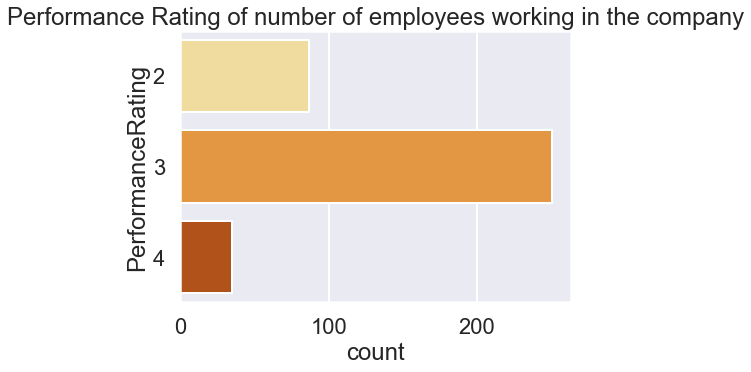

In [4]:
plt.figure(figsize=(7,5))
sns.set_theme('poster')
sns.countplot(y="PerformanceRating", data=sales, 
              palette="YlOrBr").set_title('Performance Rating of number of employees working in the company')
plt.show()

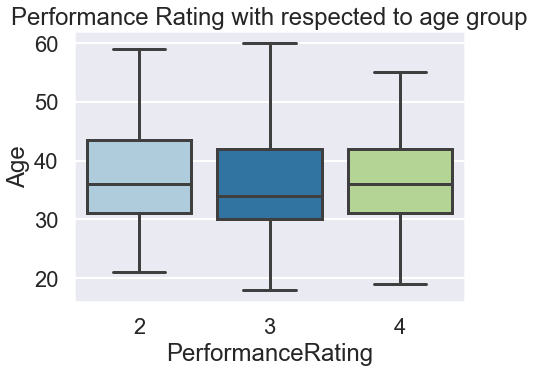

In [5]:
plt.figure(figsize=(7,5))
sns.set_theme('poster')
sns.boxplot(sales['PerformanceRating'], sales['Age'],
            palette='Paired').set_title('Performance Rating with respected to age group')
plt.show()

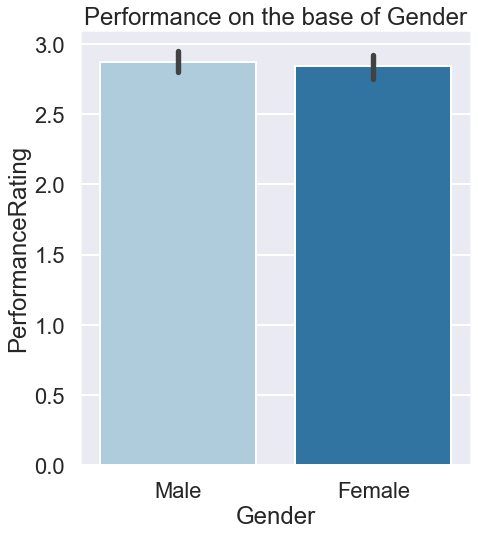

In [6]:
plt.figure(figsize=(7,8))
sns.set_theme('poster')
sns.barplot(sales['Gender'], sales['PerformanceRating'],
            palette='Paired').set_title('Performance on the base of Gender')
plt.show()

In [7]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': 'gold'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': 'mediumorchid',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': 'royalblue',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


> #### Human Resource Department

In [8]:
human_resource_department = df[df['EmpDepartment'] == 'Human Resources'] # Slicing the all coloums of Human Resource dep. Row 
human_resource_department.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3


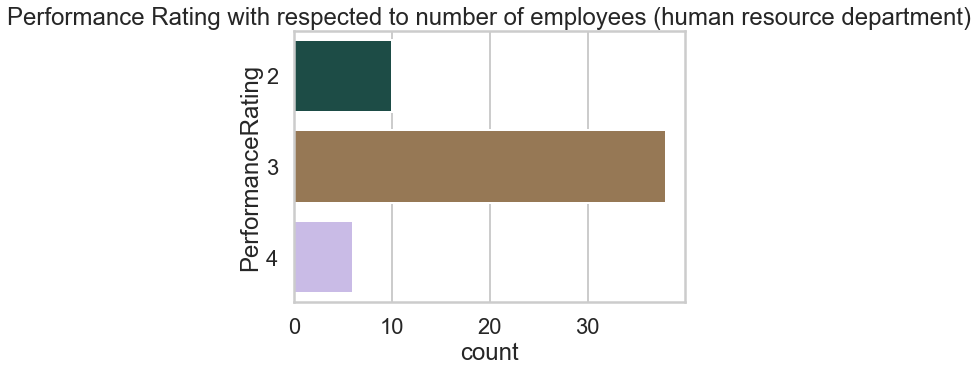

In [9]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.countplot(y="PerformanceRating",data=human_resource_department, 
              palette="cubehelix"
             ).set_title('Performance Rating with respected to number of employees (human resource department)')
plt.show()

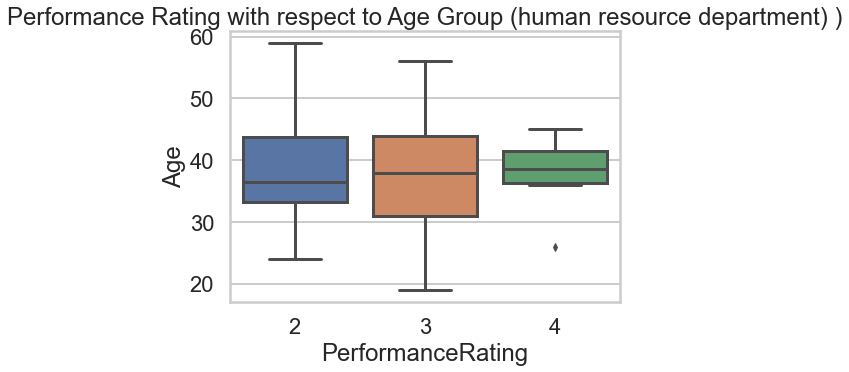

In [10]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(human_resource_department['PerformanceRating'],human_resource_department['Age'], 
              ).set_title('Performance Rating with respect to Age Group (human resource department) )')
plt.show()

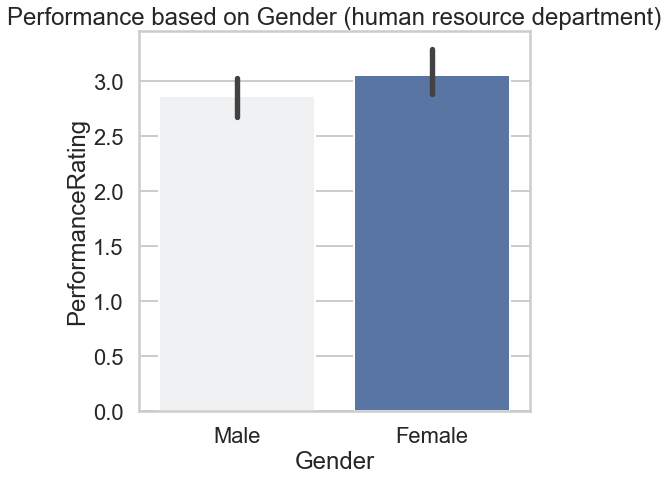

In [11]:
plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
sns.barplot(human_resource_department['Gender'],human_resource_department['PerformanceRating'], 
              palette="light:b").set_title('Performance based on Gender (human resource department)')
plt.show()


In [12]:
data = [
    {
        'x': human_resource_department['TotalWorkExperienceInYears'],
        'y': human_resource_department['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': 'sienna'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':human_resource_department['ExperienceYearsAtThisCompany'],
        'y':human_resource_department['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': 'maroon',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': human_resource_department['ExperienceYearsInCurrentRole'],
        'y': human_resource_department['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': 'navy',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - human resource department ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

> #### Department of Development

In [13]:
DD = df[df['EmpDepartment'] == 'Development'] # Slicing the all coloums of Department of Development Row 
DD.head(3)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3


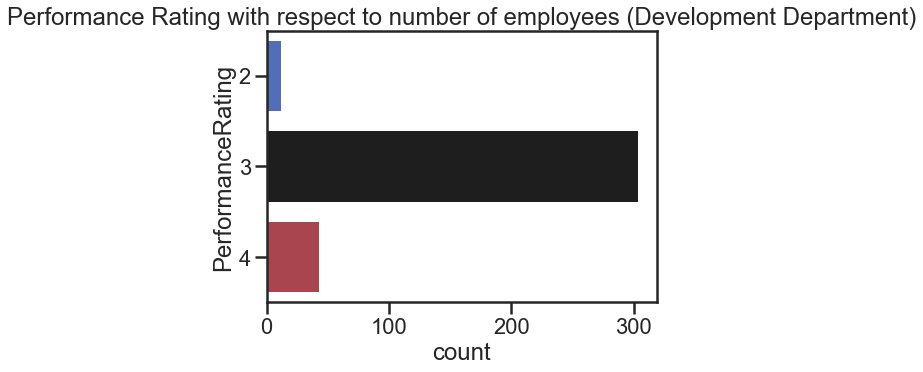

In [14]:
plt.figure(figsize=(7,5))
sns.set_style("ticks")
sns.countplot(y="PerformanceRating",data=DD, 
              palette="icefire"
             ).set_title('Performance Rating with respect to number of employees (Development Department)')
plt.show()

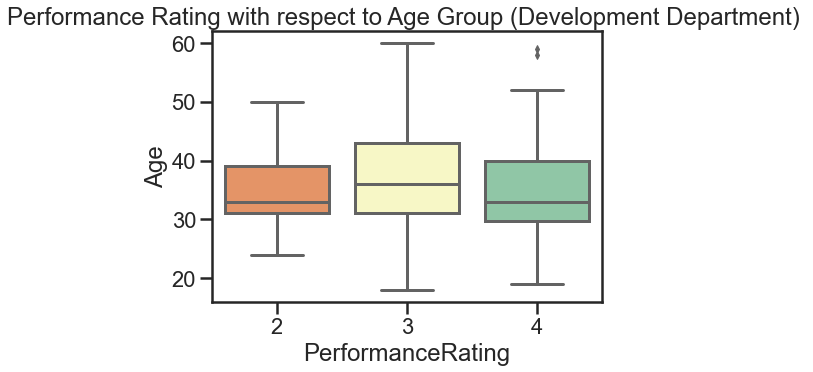

In [15]:
plt.figure(figsize=(7,5))
sns.set_style("ticks")
sns.boxplot(DD['PerformanceRating'],DD['Age'], 
              palette="Spectral"
             ).set_title('Performance Rating with respect to Age Group (Development Department) ')
plt.show()

#### <span style="font-family:Segoe Print">Performance based on Gender (Department of Development) </span>

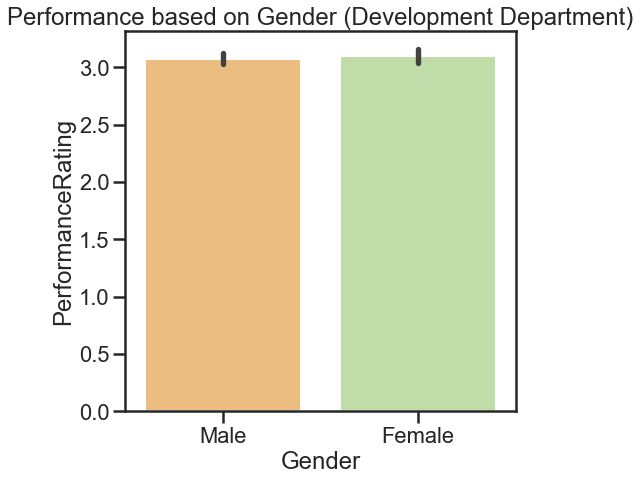

In [16]:
plt.figure(figsize=(7,7))
sns.set_style("ticks")
sns.barplot(DD['Gender'],DD['PerformanceRating'], 
              palette="Spectral"
             ).set_title('Performance based on Gender (Development Department)')
plt.show()

In [17]:
data = [
    {
        'x': DD['TotalWorkExperienceInYears'],
        'y': DD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': 'olive'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':DD['ExperienceYearsAtThisCompany'],
        'y':DD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': 'tan',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': DD['ExperienceYearsInCurrentRole'],
        'y': DD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#4d4329',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level -  Department of Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

> #### Department of Data Science 

In [18]:
Data_Science = df[df['EmpDepartment'] == 'Data Science'] # Slicing the all coloums of Department of Data science Row 
Data_Science.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3


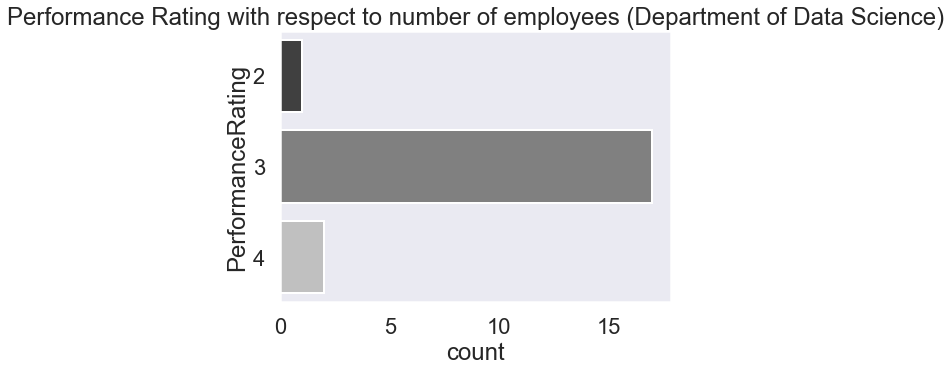

In [19]:
plt.figure(figsize=(7,5))
sns.set_style("dark")
sns.countplot(y="PerformanceRating",data=Data_Science, 
              palette="binary_r"
             ).set_title('Performance Rating with respect to number of employees (Department of Data Science)')
plt.show()

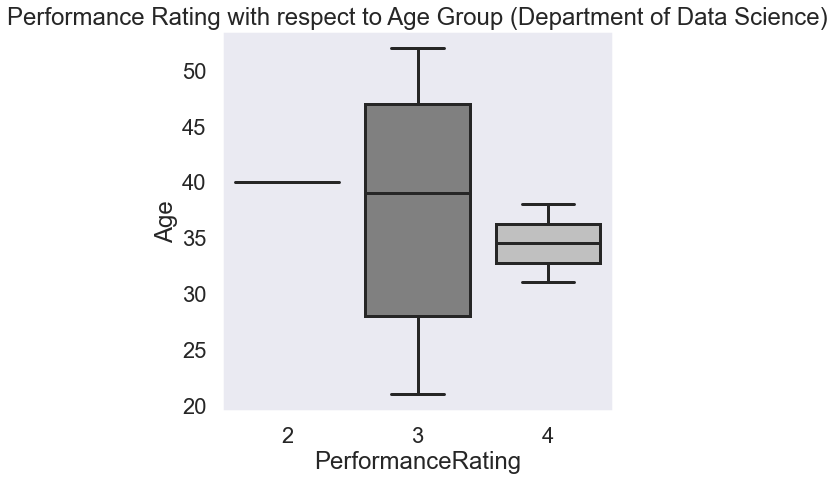

In [20]:
plt.figure(figsize=(7,7))
sns.set_style("dark")
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'], 
              palette="binary_r"
             ).set_title('Performance Rating with respect to Age Group (Department of Data Science)')
plt.show()

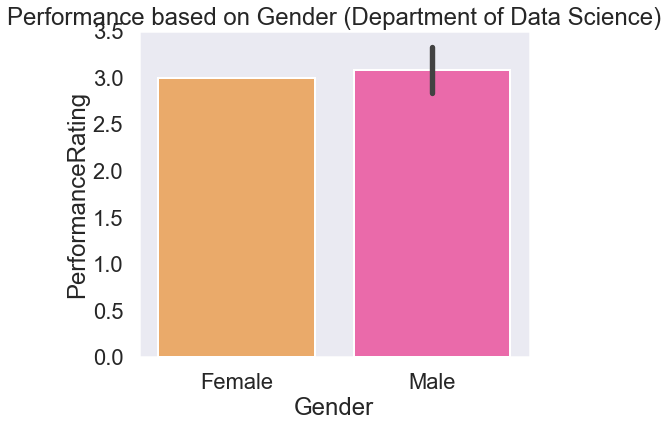

In [21]:
plt.figure(figsize=(7,6))
sns.set_style("dark")
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'], 
              palette="spring_r"
             ).set_title('Performance based on Gender (Department of Data Science)')
plt.show()

In [22]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': 'slateblue'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#232921',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#275713',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level (Department of Data Science)  ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [23]:
research_and_development = df[df['EmpDepartment'] == 'Research & Development'] 
research_and_development.head(3)                         # Slicing the all coloums of Research& Development Row

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3


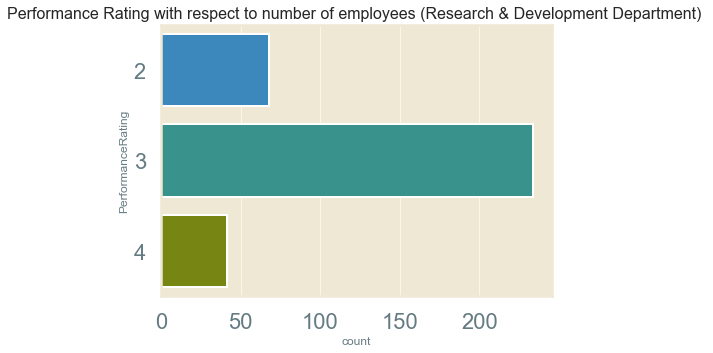

In [24]:
plt.figure(figsize=(7,5))
plt.style.use('Solarize_Light2')
sns.countplot(y="PerformanceRating", data=research_and_development, 
             ).set_title('Performance Rating with respect to number of employees (Research & Development Department) ')
plt.show()

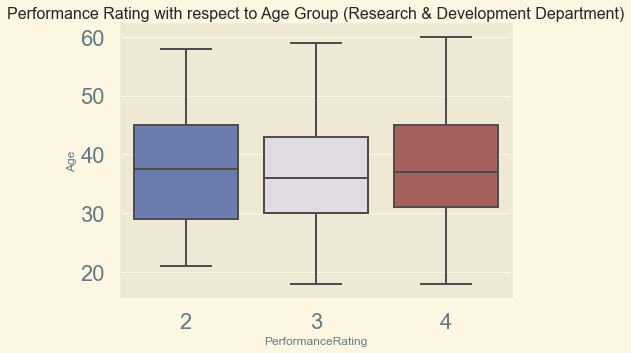

In [25]:
plt.figure(figsize=(7,5))
plt.style.context('Solarize_Light2')
sns.boxplot(research_and_development['PerformanceRating'], research_and_development['Age'],palette="twilight_shifted"
             ).set_title('Performance Rating with respect to Age Group (Research & Development Department)')
plt.show()

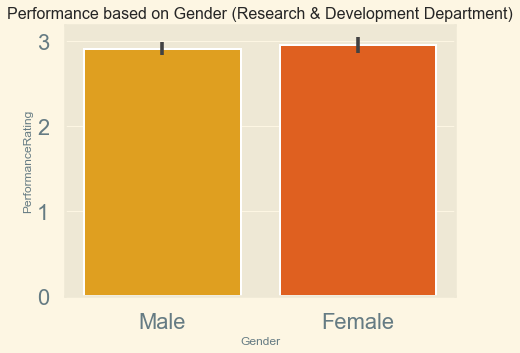

In [26]:
plt.figure(figsize=(7,5))
plt.style.context('Solarize_Light2')
sns.barplot(research_and_development['Gender'],research_and_development['PerformanceRating'],palette="autumn_r" 
             ).set_title('Performance based on Gender (Research & Development Department)')
plt.show()

In [27]:
data = [
    {
        'x': research_and_development['TotalWorkExperienceInYears'],
        'y': research_and_development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#2c4547'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':research_and_development['ExperienceYearsAtThisCompany'],
        'y':research_and_development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': 'lightslategrey',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': research_and_development['ExperienceYearsInCurrentRole'],
        'y': research_and_development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': 'red',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level (Research & Development Department)',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

> ####  Department of Finance

In [28]:
Finance = df[df['EmpDepartment'] == 'Finance'] # Slicing the all coloums of Department of Finance Row 
Finance.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2


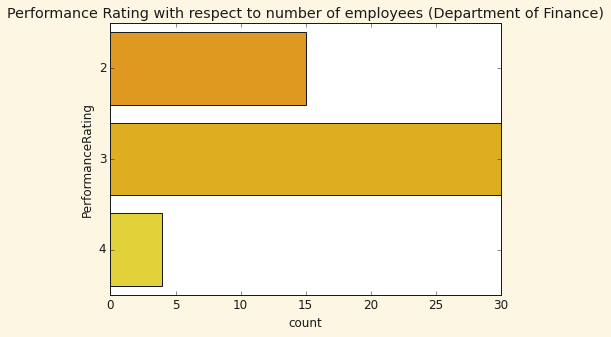

In [29]:
plt.figure(figsize=(7,5))
plt.style.use('classic')
sns.countplot(y="PerformanceRating", data=Finance,palette="Wistia_r" 
             ).set_title('Performance Rating with respect to number of employees (Department of Finance)')
plt.show()

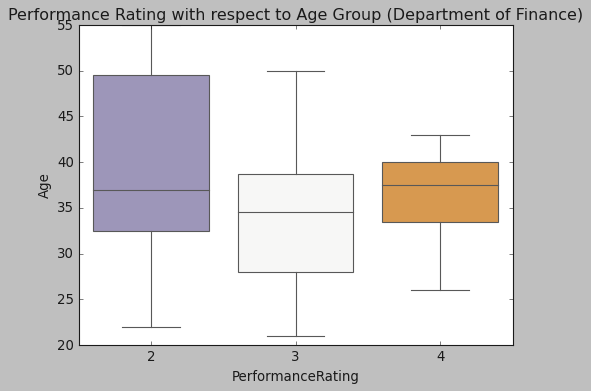

In [30]:
plt.figure(figsize=(7,5))
plt.style.use('classic')
sns.boxplot(Finance['PerformanceRating'], Finance['Age'],palette="PuOr_r"  
             ).set_title('Performance Rating with respect to Age Group (Department of Finance)')
plt.show()

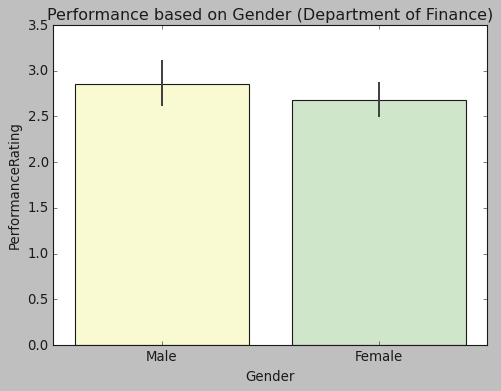

In [31]:
plt.figure(figsize=(7,5))
plt.style.use('classic')
sns.barplot(Finance['Gender'], Finance['PerformanceRating'],palette="Pastel1_r" 
             ).set_title('Performance based on Gender (Department of Finance)')
plt.show()

In [32]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#052423'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#631637',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#1d1e42',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level (Department of Finance) ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

#### <span style="font-family:cursive">Goal 2:  Top 3 Important Factors effecting employee performance</span>

 For get to known which factor is impacting the perfromance we have the  Random Forest classifier Sklearn also contains a very convenient and most useful attribute feature importances which tells us which features within our dataset has been given most importance 

In [33]:
df.drop(["EmpNumber"],axis=1,inplace=True)   # i drop Empnumber column (not important)

In [34]:
encoder = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':              # label encoding (string value to numerical value)
        print(i)
        df[i] = encoder.fit_transform(df[i])

Gender
EducationBackground
MaritalStatus
EmpDepartment
EmpJobRole
BusinessTravelFrequency
OverTime
Attrition


In [35]:
X = df.iloc[:,:-1]
y = df.PerformanceRating                    # spliting the target values and predictor values

In [36]:
X.head(3)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0


In [37]:
pd.DataFrame(y.head(3))

,PerformanceRating
0,3
1,3
2,4


In [38]:
from sklearn.model_selection import train_test_split    # spliting the into train and validation part
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.75,random_state=0)

In [39]:
 # the data not much skew dur to that we are using the SMOTE technique
    
oversampler= SMOTE(random_state=0)   
smote_train, smote_target = oversampler.fit_sample(X,y)

In [40]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(X_test)

#### <span style="font-family:cursive">Now we will see Top 3 Important Factors effecting employee performance    </span>

In [41]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = df.columns.values,
    mode='lines+markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size = 16,
        color = rf.feature_importances_,
        colorscale='balance',
        showscale=False
    ),
    text = df.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Top 3 Important Factors effecting employee performance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

> #### The 3 top factor which are affecting the INX Future comapany:-

- [X] Employees Evniroment satisfaction.
- [X] Employees salary hike.
- [X] Employees promotions